In [1]:
import pandas as pd

# 1->BM10 2->BM22 3->BM36 4->BM44 these are the brain regions 
# this file is the mapping of all the ensemble ids to gene ids mapping 
# remember to delete the new_output34 file before you run this code if in case its already created in the same directory
# else due to the append function the newly generated output will get appended to the old one 
# the below code will generate maxgene and mingene files for both the ad and ctl so that one can make plots out of it 
# max gene and mingene are the genes with maximum gene_dc value in the dataframe df  
# this code generates the plotsheet file on which we do residual analysis 

df_34=pd.read_csv('EnsemblId_OfficialGeneID.csv')

In [2]:
df_34

,g1,g2
0,RORA-AS1,MT-RNR1
1,KCNJ13,MT-RNR2
2,MBTD1,MT-RNR2
3,RPL23AP81,MT-RNR2
4,SPAG1,MT-RNR2
5,RHNO1,MT-ND1
6,ZNF493,MT-ND1
7,MECR,MT-ND2
8,RHNO1,MT-ND2
9,PSPH,MT-CO1


In [3]:
marker_genes=pd.read_csv("markers_df_human_brain.csv") 
# this file contains the marker genes for the 6 cell types 

In [4]:
ast=marker_genes['markers'][0:1000].to_list()
end=marker_genes['markers'][1000:2000].to_list()
mic=marker_genes['markers'][2000:3000].to_list()
neu=marker_genes['markers'][3000:4000].to_list()
oli=marker_genes['markers'][4000:5000].to_list()
opc=marker_genes['markers'][5000:5500].to_list()
# these list variables hold the marker genes for the respective cell types 

In [5]:
# holds the cell types as keys and the marker genes as the values
gene_dict={} 
gene_dict['ast']=ast
gene_dict['end']=end
gene_dict['mic']=mic
gene_dict['neu']=neu
gene_dict['oli']=oli
gene_dict['opc']=opc

In [6]:
# this function appends two data frames one after the other 
def append_df_to_excel(filename, df, sheet_name='Sheet1', startrow=None,
                       truncate_sheet=False, 
                       **to_excel_kwargs):
    """
    Append a DataFrame [df] to existing Excel file [filename]
    into [sheet_name] Sheet.
    If [filename] doesn't exist, then this function will create it.

    Parameters:
      filename : File path or existing ExcelWriter
                 (Example: '/path/to/file.xlsx')
      df : dataframe to save to workbook
      sheet_name : Name of sheet which will contain DataFrame.
                   (default: 'Sheet1')
      startrow : upper left cell row to dump data frame.
                 Per default (startrow=None) calculate the last row
                 in the existing DF and write to the next row...
      truncate_sheet : truncate (remove and recreate) [sheet_name]
                       before writing DataFrame to Excel file
      to_excel_kwargs : arguments which will be passed to `DataFrame.to_excel()`
                        [can be dictionary]

    Returns: None
    """
    from openpyxl import load_workbook

    import pandas as pd

    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl')

    # Python 2.x: define [FileNotFoundError] exception if it doesn't exist 
    try:
        FileNotFoundError
    except NameError:
        FileNotFoundError = IOError


    try:
        # try to open an existing workbook
        writer.book = load_workbook(filename)

        # get the last row in the existing Excel sheet
        # if it was not specified explicitly
        if startrow is None and sheet_name in writer.book.sheetnames:
            startrow = writer.book[sheet_name].max_row

        # truncate sheet
        if truncate_sheet and sheet_name in writer.book.sheetnames:
            # index of [sheet_name] sheet
            idx = writer.book.sheetnames.index(sheet_name)
            # remove [sheet_name]
            writer.book.remove(writer.book.worksheets[idx])
            # create an empty sheet [sheet_name] using old index
            writer.book.create_sheet(sheet_name, idx)

        # copy existing sheets
        writer.sheets = {ws.title:ws for ws in writer.book.worksheets}
    except FileNotFoundError:
        # file does not exist yet, we will create it
        pass

    if startrow is None:
        startrow = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startrow=startrow, **to_excel_kwargs)

    # save the workbook
    writer.save()

In [7]:
# this is the list of marker genes of al the 6 cell types 
gene_list=list(marker_genes['markers'])

In [8]:
temp_dict={0:'ast',1:'end',2:'mic',3:'neu',4:'oli',5:'opc'}

In [9]:
list1=[]
list2=[]
# here i am annotating the entire set of gene pairs as markers and non markers and appending two new columns into the dataframe 
for i, j in df_34.iterrows():
    if j['g1'] in gene_list:
        list1.append('M')
    else:
        list1.append('NM')
    if j['g2'] in gene_list: 
        list2.append('M')
    else:
        list2.append('NM')

In [10]:
df_34['m1']=list1
df_34['m2']=list2

In [11]:
df_34.to_csv("unfiltered.csv") # this file contains all the genes annotated as markers and non markers 

In [12]:
df_34=df_34.loc[(df_34['m1']=='M') & (df_34['m2']=='M')] # i am filtering only the m-m pairs 

In [13]:
# finding if the list has all the elements as same 
def checkEqual2(iterator):
    return len(set(iterator)) <= 1

In [14]:
import math
import numpy as np

# this function returns the index of the cell type the given gene is a marker gene for 
# if it is not a marker gene for a given cell type it places inf in its index  
def find_CT(element):
    lis=[]
    for keys,values in gene_dict.items():
       # print(keys,values)
        if element in values:
            lis.append(values.index(element))
        else :
            lis.append(math.inf)
# we return -1 when the given gene is not a marker gene for any cell type 
    if checkEqual2(lis):
        print(lis,element)
        return -1
# we return the index of the cell type of which the given gene is a marker and has the lowest rank 
# when the given gene is not a marker gene for any cell type we return a -1
   
    else:
        return np.argmin(lis)

In [15]:
list1=[]
list2=[]
cnt=0
# i iterate over each row of gene pairs and find their corresponding cell types for which they are markers to   
for i, j in df_34.iterrows():
    temp1=find_CT(j['g1'])
    temp2=find_CT(j['g2'])
    if temp1 != -1 :
        list1.append(temp_dict[temp1])
    else:
        list1.append(-1)
    if temp2 != -1:
        list2.append(temp_dict[temp2])
    else:
        list2.append(-1)

In [16]:
# this lists contain the cell types of the both pair of genes 
cell34_3=list1
cell34_4=list2
df_34['c1']=cell34_3
df_34['c2']=cell34_4

C:\Users\BIRDS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\BIRDS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
# filtering the rows which have genes only with both of them are marker genes to some cell types
df_34=df_34[(df_34['c1']!=-1) & (df_34['c2']!=-1)]

In [18]:
append_df_to_excel("newoutput_34.xlsx",df_34, sheet_name='Sheet1', startrow=None,truncate_sheet=False)

In [19]:
import pandas as pd 
import scipy.stats as sp
df=pd.read_excel(open('newoutput_34.xlsx', 'rb'),sheet_name='Sheet1')
# reading from the 34 matrix
# this dataframe contains only the marker genes and their corresponding cell types 
# this dataframe contains the marker genes for the BM36 AND BM44 regions 

In [20]:
len(df)

1813

In [21]:
ad_36=pd.read_csv("AD_36.csv")
ad_44=pd.read_csv("AD_44.csv")
ctl_36=pd.read_csv("CTL_36.csv")
ctl_44=pd.read_csv("CTL_44.csv")
# THE BELOW ARE THE CELL TYPE FREQUENCY DATA FOR THE ABOVE DATASETS 
ad_36_cts=pd.read_csv("AD_36_cts.csv")
ad_44_cts=pd.read_csv("AD_44_cts.csv")
ctl_36_cts=pd.read_csv("CTL_36_cts.csv")
ctl_44_cts=pd.read_csv("CTL_44_cts.csv")

In [22]:
ad_36.columns

Index(['Unnamed: 0', 'MT-TF', 'MT-RNR1', 'MT-RNR2', 'MT-ND1', 'MT-ND2',
       'MT-TY', 'MT-CO1', 'MT-CO2', 'MT-ATP8',
       ...
       'NA.3218', 'MIR381HG', 'MEG9', 'NA.3219', 'DIO3OS', 'PPP2R5C',
       'NA.3220', 'NA.3221', 'NA.3222', 'DYNC1H1'],
      dtype='object', length=16384)

In [23]:
corr1=[]
temp=[]
for elem in ad_36_cts.columns[1:]:
    for ele in ad_44_cts.columns[1:]:
        temp.append(sp.spearmanr(ad_36_cts[elem].to_list(),ad_44_cts[ele].to_list())[0])
       
    corr1.append(temp)    
    temp=[]

In [24]:
corr2=[]
temp=[]
for elem in ctl_36_cts.columns[1:]:
    for ele in ctl_44_cts.columns[1:]:
        temp.append(sp.spearmanr(ctl_36_cts[elem].to_list(),ctl_44_cts[ele].to_list())[0])   
    
    corr2.append(temp)    
    temp=[]

In [25]:
corr1=np.array(corr1)
corr2=np.array(corr2)
cormatrix1=pd.DataFrame(data=corr1,index=ad_36_cts.columns[1:], columns=ad_36_cts.columns[1:], dtype=None, copy=False)
cormatrix2=pd.DataFrame(data=corr2,index=ctl_36_cts.columns[1:], columns=ctl_36_cts.columns[1:], dtype=None, copy=False)

In [26]:
DC_matrix=cormatrix1-cormatrix2

In [27]:
DC_matrix.to_csv('heatmap.csv')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatMap(df,dataset):
    #Create Correlation df
    corr = df
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.xlabel(dataset)
    plt.show()

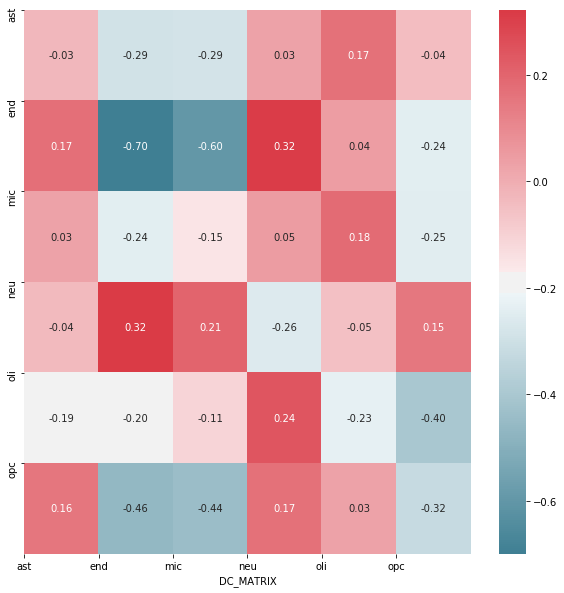

In [29]:
heatMap(DC_matrix,"DC_MATRIX")

In [30]:
DC_matrix

,ast,end,mic,neu,oli,opc
ast,-0.026913,-0.290614,-0.285768,0.032461,0.166248,-0.041882
end,0.172166,-0.700165,-0.597644,0.316437,0.042506,-0.244011
mic,0.034027,-0.242468,-0.151166,0.046975,0.182847,-0.248084
neu,-0.035683,0.321648,0.205333,-0.256056,-0.051170,0.150159
oli,-0.194960,-0.203635,-0.107595,0.241851,-0.229717,-0.404785
opc,0.155562,-0.461393,-0.441747,0.168882,0.034198,-0.323702


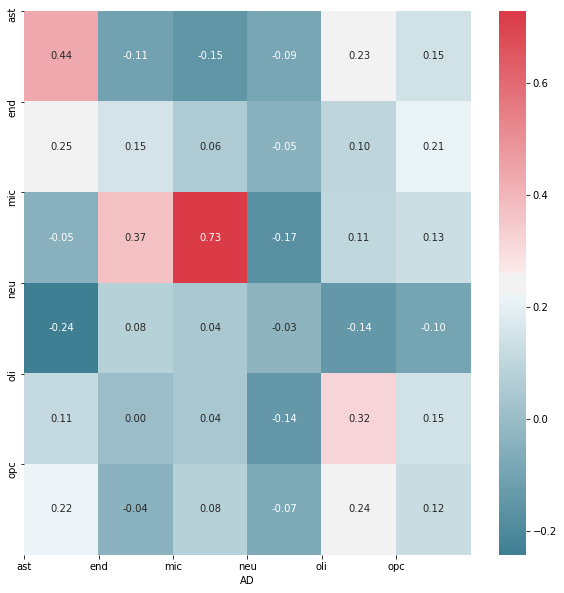

In [31]:
heatMap(cormatrix1,"AD")

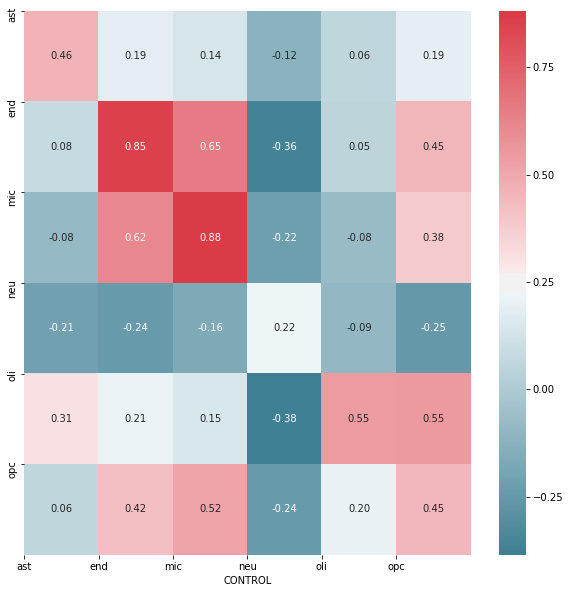

In [32]:
heatMap(cormatrix2,"CONTROL")

In [33]:
# df contains only the marker genes and their corresponding cell types 
# df contains the marker genes for the BM36 AND BM44 regions 
list1=[] # holds the gene correlation between the ad
list2=[] # holds the gene correlation between the controls 
list3=[]
list4=[]
list_of_genes=ad_36.columns
cnt=0
for i, j in df.iterrows():
    gene1=j['g1']
    gene2=j['g2']
    cell1=j['c1']
    cell2=j['c2']
    if gene1 in list_of_genes and gene2 in list_of_genes:
        list1.append(sp.spearmanr(ad_36[gene1].to_list(),ad_44[gene2].to_list())[0])
        list2.append(sp.spearmanr(ctl_36[gene1].to_list(),ctl_44[gene2].to_list())[0])
    else:
        list1.append(-math.inf)
        list2.append(-math.inf)
        list3.append(-math.inf)
        list4.append(-math.inf)
        continue
    list3.append(sp.spearmanr(ad_36_cts[cell1].to_list(),ad_44_cts[cell2].to_list())[0])
    list4.append(sp.spearmanr(ctl_36_cts[cell1].to_list(),ctl_44_cts[cell2].to_list())[0])


In [34]:
# applying the z transform function
list1=np.arctanh(np.array(list1))
list2=np.arctanh(np.array(list2))
list3=np.arctanh(np.array(list3))
list4=np.arctanh(np.array(list4))
dc_gene=(list1-list2) # the difference in correlation between the genes in 36-44
dc_cell=(list3-list4) # the difference in correlation between the cells in 36-44
df['DC_gene']=dc_gene
df['DC_cell']=dc_cell
df['corr_gene_ad']=list1
df['corr_gene_ctl']=list2
df['corr_ctype_ad']=list3
df['corr_ctype_ctl']=list4

C:\Users\BIRDS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arctanh
  
C:\Users\BIRDS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arctanh
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BIRDS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arctanh
  after removing the cwd from sys.path.
C:\Users\BIRDS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arctanh
  """


In [35]:
df

,Unnamed: 0,g1,g2,m1,m2,c1,c2,DC_gene,DC_cell,corr_gene_ad,corr_gene_ctl,corr_ctype_ad,corr_ctype_ctl
0,105,ZNF596,ZNF143,M,M,neu,mic,NaN,NaN,NaN,NaN,NaN,NaN
1,107,DKC1,ADM,M,M,mic,end,0.622704,-0.326606,0.704485,0.081782,0.394057,0.720663
2,113,TET1,GALNT18,M,M,ast,end,NaN,NaN,NaN,NaN,NaN,NaN
3,150,FAM149A,SLC1A2,M,M,mic,ast,NaN,NaN,NaN,NaN,NaN,NaN
4,301,LINC01546,EHD1,M,M,opc,end,-0.641270,-0.489421,-0.602144,0.039127,-0.039949,0.449471
5,397,ZBBX,CLPB,M,M,neu,mic,-0.651734,0.206826,-0.681173,-0.029439,0.042320,-0.164506
6,398,TMEM150C,CLPB,M,M,ast,mic,NaN,NaN,NaN,NaN,NaN,NaN
7,407,HTRA1,SERPINH1,M,M,ast,end,NaN,NaN,NaN,NaN,NaN,NaN
8,409,TMEM229A,LRRC32,M,M,ast,end,-0.633892,-0.293174,-0.649374,-0.015483,-0.105632,0.187542
9,410,THSD1,LRRC32,M,M,ast,end,-0.679995,-0.293174,-0.609973,0.070022,-0.105632,0.187542


In [36]:
df=df.dropna()

In [37]:
df

,Unnamed: 0,g1,g2,m1,m2,c1,c2,DC_gene,DC_cell,corr_gene_ad,corr_gene_ctl,corr_ctype_ad,corr_ctype_ctl
1,107,DKC1,ADM,M,M,mic,end,0.622704,-0.326606,0.704485,0.081782,0.394057,0.720663
4,301,LINC01546,EHD1,M,M,opc,end,-0.641270,-0.489421,-0.602144,0.039127,-0.039949,0.449471
5,397,ZBBX,CLPB,M,M,neu,mic,-0.651734,0.206826,-0.681173,-0.029439,0.042320,-0.164506
8,409,TMEM229A,LRRC32,M,M,ast,end,-0.633892,-0.293174,-0.649374,-0.015483,-0.105632,0.187542
9,410,THSD1,LRRC32,M,M,ast,end,-0.679995,-0.293174,-0.609973,0.070022,-0.105632,0.187542
10,417,EFHC1,OR7E13P,M,M,ast,opc,-0.758245,-0.043116,-0.601929,0.156317,0.148855,0.191971
12,424,MATN3,CHORDC1,M,M,end,opc,-0.659474,-0.276404,-0.716300,-0.056826,0.212358,0.488762
13,426,ERBB2,CHORDC1,M,M,ast,opc,-0.659965,-0.043116,-0.640691,0.019273,0.148855,0.191971
14,428,MSH4,CHORDC1,M,M,oli,opc,0.728986,-0.472730,0.821980,0.092994,0.147723,0.620453
15,432,EDN1,CHORDC1,M,M,end,opc,-0.641900,-0.276404,-0.607698,0.034201,0.212358,0.488762


In [38]:
sp.spearmanr(df['DC_gene'].to_list(),df['DC_cell'].to_list())[0]

0.23402453925480218

In [39]:
append_df_to_excel("plotsheet.xlsx",df,sheet_name='Sheet1', startrow=None,truncate_sheet=False)

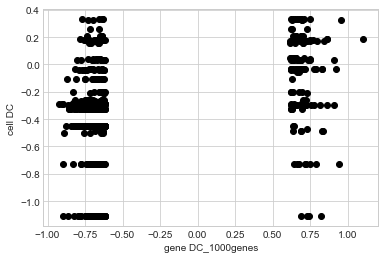

In [40]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
x=df['DC_gene'].to_list()
y=df['DC_cell'].to_list()
plt.plot(x, y, 'o', color='black')
plt.xlabel("gene DC_1000genes")
plt.ylabel("cell DC")
plt.show()

In [41]:
max_tuple=df.loc[df['DC_gene']==max(df['DC_gene'])]
min_tuple=df.loc[df['DC_gene']==min(df['DC_gene'])]
max_gene1=max_tuple['g1'].values[0]
max_gene2=max_tuple['g2'].values[0]
min_gene1=min_tuple['g1'].values[0]
min_gene2=min_tuple['g2'].values[0]
max_cell1=max_tuple['c1'].values[0]
max_cell2=max_tuple['c2'].values[0]
min_cell1=min_tuple['c1'].values[0]
min_cell2=min_tuple['c2'].values[0]

In [42]:
# ad_36=pd.read_csv("AD_36.csv")
# ad_44=pd.read_csv("AD_44.csv")
# ctl_36=pd.read_csv("CTL_36.csv")
# ctl_44=pd.read_csv("CTL_44.csv")
# # THE BELOW ARE THE CELL TYPE FREQUENCY DATA FOR THE ABOVE DATASETS 
# ad_36_cts=pd.read_csv("AD_36_cts.csv")
# ad_44_cts=pd.read_csv("AD_44_cts.csv")
# ctl_36_cts=pd.read_csv("CTL_36_cts.csv")
# ctl_44_cts=pd.read_csv("CTL_44_cts.csv")

In [43]:
def make_plot(x,y,disease_state,xl,yl):
    plt.plot(x, y, 'o', color='red')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(disease_state)
    plt.show()

In [44]:
# the code below is to generate the files required for making plots

In [45]:
max_gene_ad=pd.concat([ad_36[max_gene1],ad_44[max_gene2],ad_36_cts[max_cell1],ad_44_cts[max_cell2]],axis=1, ignore_index=True)

In [46]:
ad_36

,Unnamed: 0,MT-TF,MT-RNR1,MT-RNR2,MT-ND1,MT-ND2,MT-TY,MT-CO1,MT-CO2,MT-ATP8,...,NA.3218,MIR381HG,MEG9,NA.3219,DIO3OS,PPP2R5C,NA.3220,NA.3221,NA.3222,DYNC1H1
0,P19B648.BM_36_544,-0.886502,8.555036,9.657060,7.525424,7.082397,-1.272990,12.199117,9.126849,3.525735,...,-1.039950,0.815478,1.390278,-0.137938,1.666727,7.383567,-0.670897,-0.293562,-0.861846,10.605055
1,S111B355.BM_36_387,-1.100613,7.060245,8.963445,7.320961,7.041746,-1.328533,12.100395,8.960101,2.954697,...,-1.496621,-1.592420,0.856556,-0.125839,0.994559,7.456762,0.212818,-0.460739,-0.509108,10.514992
2,S110B355.BM_36_332,-1.936097,7.830761,9.744559,6.578967,6.509566,-3.492315,10.366678,7.899284,2.341559,...,-0.526515,-0.352449,-0.287901,-1.448426,0.011147,7.358822,-0.727944,-1.045398,-0.853947,10.530703
3,K77C014.hB_RNA_10802,-1.312544,7.280596,9.238414,7.626264,7.610697,-2.011455,11.985150,9.304482,3.641862,...,-0.350497,-0.848296,1.270524,-0.066514,0.853361,7.555566,-0.506576,-0.880516,0.405046,10.268239
4,E007C014.hB_RNA_10832,-2.007849,7.871330,9.552664,7.146731,6.933952,-2.343633,12.070774,8.973667,3.390141,...,-1.844335,-0.608323,1.014290,-0.107907,1.061026,7.347629,0.204022,0.131606,-1.784902,10.253696
5,S110B355.BM_36_304,-2.516445,6.715835,8.742544,6.605550,6.411582,-0.946499,11.170212,8.172494,2.711404,...,-2.278580,-0.414938,0.753474,-1.335032,0.544642,7.421460,-0.618965,-0.852355,-1.143534,10.672671
6,S109B355.BM_36_296,-0.765162,8.076608,9.624528,7.626317,7.467344,-0.487953,12.058177,9.245931,3.719936,...,-2.976242,-1.141154,0.462025,-0.294937,0.921631,7.386139,0.075820,-0.118814,-0.394476,10.285625
7,S111B355.BM_36_424,-2.266362,7.589377,8.867222,7.369300,7.110982,-1.928347,11.425950,8.442013,3.406039,...,0.418012,1.581711,2.112778,-0.279547,-1.641330,7.704460,-0.265028,-0.889411,-1.022566,10.967022
8,E007C014.hB_RNA_10702,-1.687626,8.149647,9.597440,7.592547,7.346909,0.236608,12.185895,9.194095,2.905245,...,0.025872,-0.347367,1.088868,-0.699205,1.580820,7.305880,0.562377,-0.965506,0.101276,10.312393
9,K77C014.hB_RNA_10712,-1.460013,7.986229,9.796647,7.874175,7.972016,0.890862,12.903010,9.846985,3.785927,...,-1.791795,-1.529554,1.097676,-0.783670,-0.333239,7.617537,-0.176980,-3.576243,-2.044611,10.171636


In [47]:
# the below code will generate maxgene and mingene files for both the ad and ctl so that one can make plots out of it 

In [48]:
max_gene_ad.columns=['AD_36__MAX_GENE1', 'AD_44_MAX_GENE2','AD_36_CTS_MAX_CELL1','AD_44_CTS_MAX_CELL2']

In [49]:
max_gene_ad.to_csv('max_gene_ad.csv')

In [50]:
max_gene_ctl=pd.concat([ctl_36[max_gene1],ctl_44[max_gene2],ctl_36_cts[max_cell1],ctl_44_cts[max_cell2]],axis=1, ignore_index=True)

In [51]:
max_gene_ctl.columns=['CTL_36__MAX_GENE1', 'CTL_44_MAX_GENE2','CTL_36_CTS_MAX_CELL1','CTL_44_CTS_MAX_CELL2']

In [52]:
max_gene_ctl.to_csv('max_gene_ctl.csv')

In [53]:
min_gene_ad=pd.concat([ad_36[min_gene1],ad_44[min_gene2],ad_36_cts[min_cell1],ad_44_cts[min_cell2]],axis=1, ignore_index=True)

In [54]:
min_gene_ad.columns=['AD_36__MIN_GENE1', 'AD_44_MIN_GENE2','AD_36_CTS_MIN_CELL1','AD_44_CTS_MIN_CELL2']

In [55]:
min_gene_ad.to_csv('min_gene_ad.csv')

In [56]:
min_gene_ctl=pd.concat([ctl_36[min_gene1],ctl_44[min_gene2],ctl_36_cts[min_cell1],ctl_44_cts[min_cell2]],axis=1, ignore_index=True)

In [57]:
min_gene_ctl.columns=['CTL_36__MIN_GENE1', 'CTL_44_MIN_GENE2','CTL_36_CTS_MIN_CELL1','CTL_44_CTS_MIN_CELL2']

In [58]:
min_gene_ctl.to_csv('min_gene_ctl.csv')

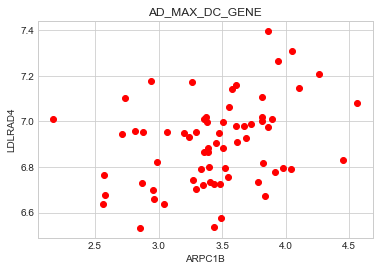

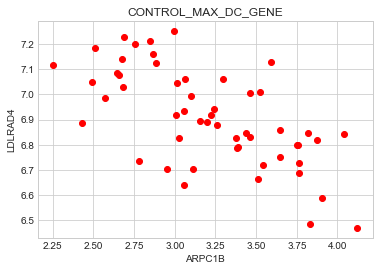

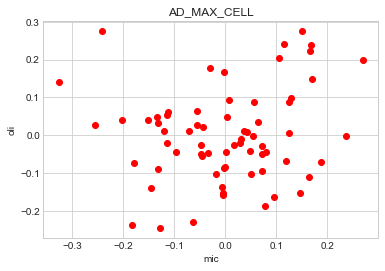

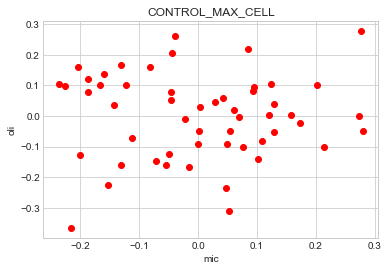

In [59]:
# g1g2 c1c2 for max gene in both disease and control
make_plot(ad_36[max_gene1],ad_44[max_gene2],"AD_MAX_DC_GENE",max_gene1,max_gene2)
make_plot(ctl_36[max_gene1],ctl_44[max_gene2],"CONTROL_MAX_DC_GENE",max_gene1,max_gene2)

make_plot(ad_36_cts[max_cell1],ad_44_cts[max_cell2],"AD_MAX_CELL",max_cell1,max_cell2)
make_plot(ctl_36_cts[max_cell1],ctl_44_cts[max_cell2],"CONTROL_MAX_CELL",max_cell1,max_cell2)

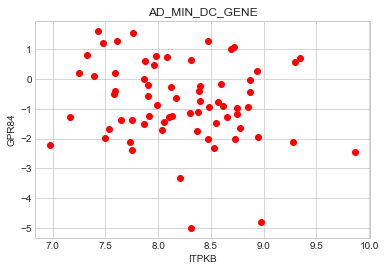

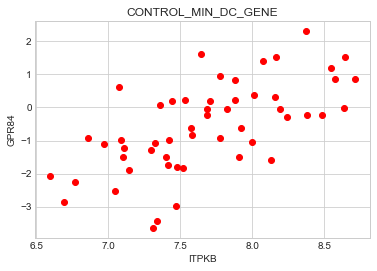

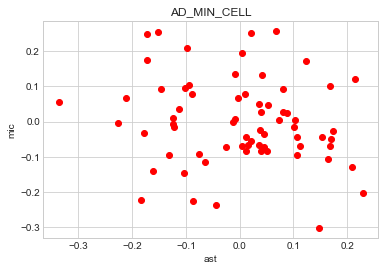

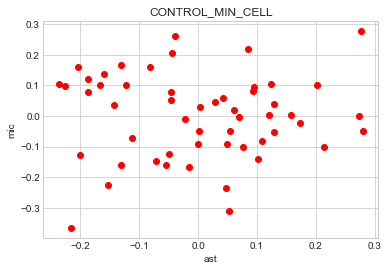

In [60]:
#g1g2 c1c2 for min gene in both disease and control
make_plot(ad_36[min_gene1],ad_44[min_gene2],"AD_MIN_DC_GENE",min_gene1,min_gene2)
make_plot(ctl_36[min_gene1],ctl_44[min_gene2],"CONTROL_MIN_DC_GENE",min_gene1,min_gene2)

make_plot(ad_36_cts[min_cell1],ad_44_cts[min_cell2],"AD_MIN_CELL",min_cell1,min_cell2)
make_plot(ctl_36_cts[max_cell1],ctl_44_cts[max_cell2],"CONTROL_MIN_CELL",min_cell1,min_cell2)

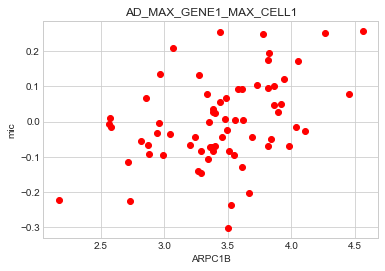

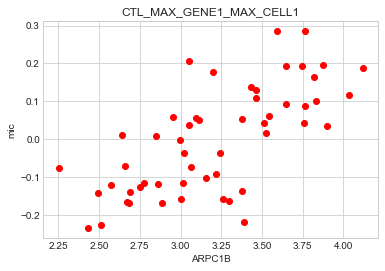

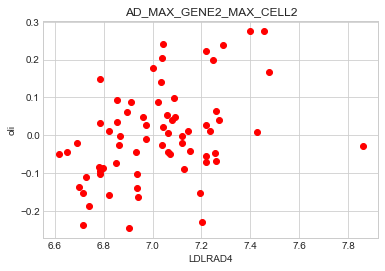

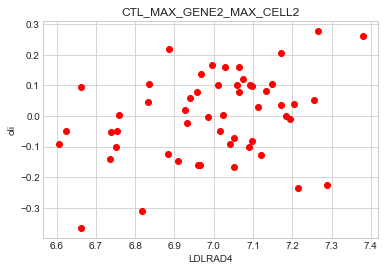

In [61]:
# g1 c1,g2 c2 for max gene for both disease and control for max gene and max cell
make_plot(ad_36[max_gene1],ad_44_cts[max_cell1],"AD_MAX_GENE1_MAX_CELL1",max_gene1,max_cell1)
make_plot(ctl_36[max_gene1],ctl_44_cts[max_cell1],"CTL_MAX_GENE1_MAX_CELL1",max_gene1,max_cell1)

# make_plot(ad_36[max_gene1],ad_44_cts[max_cell2],"AD_MAX_GENE1_MAX_CELL2",max_gene1,max_cell2)
# make_plot(ctl_36[max_gene1],ctl_44_cts[max_cell2],"CTL_MAX_GENE1_MAX_CELL2",max_gene1,max_cell2)

# make_plot(ad_36[max_gene2],ad_44_cts[max_cell1],"AD_MAX_GENE2_MAX_CELL1",max_gene2,max_cell1)
# make_plot(ctl_36[max_gene2],ctl_44_cts[max_cell1],"CTL_MAX_GENE2_MAX_CELL1",max_gene2,max_cell1)

make_plot(ad_36[max_gene2],ad_44_cts[max_cell2],"AD_MAX_GENE2_MAX_CELL2",max_gene2,max_cell2)
make_plot(ctl_36[max_gene2],ctl_44_cts[max_cell2],"CTL_MAX_GENE2_MAX_CELL2",max_gene2,max_cell2)




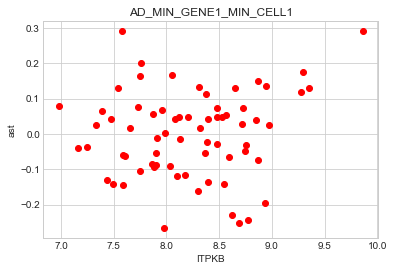

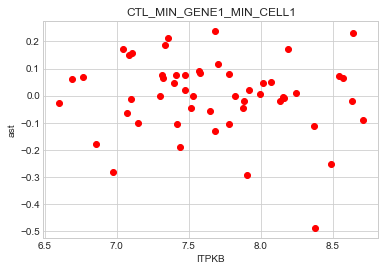

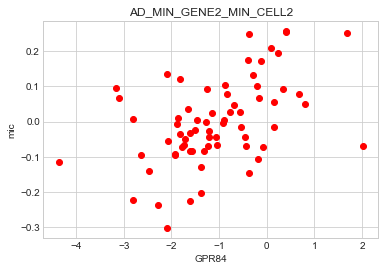

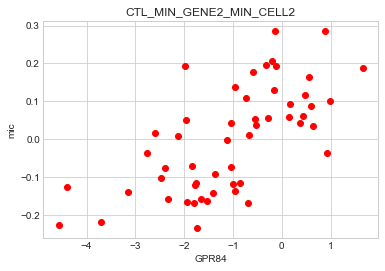

In [62]:
# g1 c1,g2 c2 for max gene for both disease and control for min gene and min cell
make_plot(ad_36[min_gene1],ad_44_cts[min_cell1],"AD_MIN_GENE1_MIN_CELL1",min_gene1,min_cell1)
make_plot(ctl_36[min_gene1],ctl_44_cts[min_cell1],"CTL_MIN_GENE1_MIN_CELL1",min_gene1,min_cell1)

# make_plot(ad_36[min_gene1],ad_44_cts[min_cell2],"AD_MIN_GENE1_MIN_CELL2",min_gene1,min_cell2)
# make_plot(ctl_36[min_gene1],ctl_44_cts[min_cell2],"CTL_MIN_GENE1_MIN_CELL2",min_gene1,min_cell2)

# make_plot(ad_36[min_gene2],ad_44_cts[min_cell1],"AD_MIN_GENE2_MIN_CELL1",min_gene2,min_cell1)
# make_plot(ctl_36[min_gene2],ctl_44_cts[min_cell1],"CTL_MIN_GENE2_MIN_CELL1",min_gene2,min_cell1)

make_plot(ad_36[min_gene2],ad_44_cts[min_cell2],"AD_MIN_GENE2_MIN_CELL2",min_gene2,min_cell2)
make_plot(ctl_36[min_gene2],ctl_44_cts[min_cell2],"CTL_MIN_GENE2_MIN_CELL2",min_gene2,min_cell2)